In [49]:
#Load the data file
import pandas as pd
raw_df=pd.read_excel("C:/Users//HEMANT RAHALKAR/Downloads/spotify.xlsx")

In [50]:
#Examine the first few rows
raw_df.head()

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310


In [51]:
# Variable Information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3756 entries, 0 to 3755
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           3756 non-null   object 
 1   artists           3756 non-null   object 
 2   name              3756 non-null   object 
 3   acousticness      3756 non-null   float64
 4   danceability      3756 non-null   float64
 5   duration_ms       3756 non-null   int64  
 6   energy            3756 non-null   float64
 7   instrumentalness  3756 non-null   float64
 8   loudness          3756 non-null   float64
 9   popularity        3756 non-null   int64  
 10  tempo             3756 non-null   float64
 11  valence           3756 non-null   float64
dtypes: float64(7), int64(2), object(3)
memory usage: 352.3+ KB


In [52]:
#Data summary
raw_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,0.269698,0.657709,197443.986422,0.594279,0.059002,-7.650091,66.595847,119.971760,0.473756
std,0.282350,0.178534,50777.584692,0.203838,0.213182,5.330739,15.654377,31.031675,0.230290
min,0.000002,0.000000,32679.000000,0.000020,0.000000,-47.452000,0.000000,0.000000,0.000000
25%,0.047100,0.561000,168750.750000,0.493000,0.000000,-8.165750,64.000000,95.082500,0.305000
50%,0.163000,0.685000,193597.000000,0.621000,0.000000,-6.350000,68.000000,120.004500,0.474000
75%,0.406000,0.786000,219589.250000,0.732000,0.000052,-4.934250,73.000000,142.037500,0.647000
max,0.996000,0.978000,764457.000000,1.000000,0.992000,0.457000,100.000000,210.164000,0.979000


In [53]:
#Select columns required for analysis into a dataframe for clustering
selected_columns_df = raw_df[['acousticness','danceability','duration_ms','energy','instrumentalness','loudness','popularity','tempo', 'valence']]

In [54]:
selected_columns_df

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120
1,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391
2,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160
3,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770
4,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310
...,...,...,...,...,...,...,...,...,...
3751,0.17300,0.875,163800,0.443,0.000032,-7.461,75,100.012,0.3060
3752,0.01670,0.719,167468,0.385,0.031300,-10.907,64,128.000,0.2700
3753,0.53800,0.514,180700,0.539,0.002330,-9.332,70,123.700,0.1530
3754,0.07140,0.646,167308,0.761,0.000000,-2.557,70,129.916,0.4720


In [55]:
from sklearn import preprocessing
#Scale the data to suppress the effect of variables with higher scale / variables in different units
scaler = preprocessing.StandardScaler().fit(selected_columns_df)
scaled_df= pd.DataFrame(scaler.fit_transform(selected_columns_df),columns=selected_columns_df.columns, index=selected_columns_df.index)

In [56]:
scaled_df

,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence
0,1.998856,0.281727,-0.345395,-1.252529,-0.276805,0.106020,0.345263,-0.063710,0.166089
1,2.374326,-3.040214,0.985921,-2.381025,4.184774,-2.920980,0.025821,-1.411931,-1.887678
2,-0.941217,0.130475,-0.321523,0.999555,-0.276781,0.615961,0.281374,-0.450624,0.183460
3,-0.863927,0.388163,0.366805,1.082966,-0.276805,0.974871,0.920258,1.808175,0.882670
4,-0.732867,0.617842,0.524297,0.229235,-0.276805,0.272623,-0.101956,0.805453,-1.054272
...,...,...,...,...,...,...,...,...,...
3751,-0.342519,1.217248,-0.662664,-0.742253,-0.276653,0.035477,0.536928,-0.643292,-0.728553
3752,-0.896161,0.343348,-0.590418,-1.026830,-0.129962,-0.611049,-0.165844,0.258746,-0.884898
3753,0.950373,-0.805046,-0.329795,-0.271229,-0.265874,-0.315553,0.217486,0.120159,-1.393020
3754,-0.702404,-0.065592,-0.593569,0.818015,-0.276805,0.955546,0.217486,0.320497,-0.007628


In [57]:
import warnings
warnings.filterwarnings("ignore")

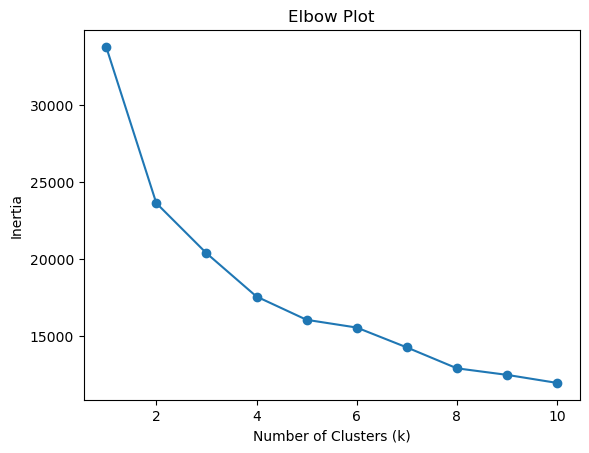

In [58]:
#Identify the number of clusters
from sklearn.cluster import KMeans
#number of clusters we want
k_values = range(1, 11)
# Fit KMeans for each k and calculate the inertia (sum of squared distances to the nearest centroid)
inertia_values = []
for k in k_values:
 kmeans = KMeans (n_clusters=k, random_state=42)
 kmeans.fit(scaled_df)
 inertia_values.append(kmeans. inertia_)
import matplotlib.pyplot as plt
# Plot the elbow plot
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [59]:
# Identify the value of K using Silhouette
# ======== =================
from sklearn.metrics import silhouette_score
silhouette_scores = []
k_values=range(2, 11)
for k in k_values:
    kmeans = KMeans (n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    labels=kmeans.labels_
    silhouette_avg = silhouette_score (scaled_df, labels)
    silhouette_scores. append(silhouette_avg)
    print("For k=", k, ", the silhouette score is:", silhouette_avg)
    optimal_k = k_values [silhouette_scores.index (max(silhouette_scores))]
print("The optimal number of clusters (k) is: ", optimal_k)

For k= 2 , the silhouette score is: 0.578656044586165
For k= 3 , the silhouette score is: 0.18769846820594516
For k= 4 , the silhouette score is: 0.2041726865984411
For k= 5 , the silhouette score is: 0.16693522541061795
For k= 6 , the silhouette score is: 0.17355375530157705
For k= 7 , the silhouette score is: 0.16496964506084894
For k= 8 , the silhouette score is: 0.1705926576089632
For k= 9 , the silhouette score is: 0.1652647205085988
For k= 10 , the silhouette score is: 0.16119165992354678
The optimal number of clusters (k) is:  2


In [60]:
#Now for k =3

# Create Clusters using the k-identified
k=3
from sklearn.cluster import KMeans
cluster_model=KMeans (n_clusters=k, random_state=10).fit(scaled_df)
print("Model", cluster_model)

Model KMeans(n_clusters=3, random_state=10)


In [61]:
print("Model", cluster_model.labels_)

Model [2 1 0 ... 2 0 2]


In [62]:
# Add cluster details to the original data
raw_df['cluster_id'] = cluster_model.labels_

In [63]:
raw_df

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence,cluster_id
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120,2
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391,1
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160,0
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770,0
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,4KppkflX7I3vJQk7urOJaS,"['DripReport', 'Tyga']",Skechers (feat. Tyga) - Remix,0.17300,0.875,163800,0.443,0.000032,-7.461,75,100.012,0.3060,0
3752,1ehhGlTvjtHo2e4xJFB0SZ,"['Leon Bridges', 'Terrace Martin']",Sweeter (feat. Terrace Martin),0.01670,0.719,167468,0.385,0.031300,-10.907,64,128.000,0.2700,2
3753,52eycxprLhK3lPcRLbQiVk,"['Kygo', 'Oh Wonder']",How Would I Know,0.53800,0.514,180700,0.539,0.002330,-9.332,70,123.700,0.1530,2
3754,3wYOGJYD31sLRmBgCvWxa4,"['Cash Cash', 'Andy Grammer']",I Found You,0.07140,0.646,167308,0.761,0.000000,-2.557,70,129.916,0.4720,0


In [64]:
#Write the results for making interpretaions
raw_df.to_excel('spotify_cluster3.xlsx',index=False)

In [65]:
# Profile Clusters
centroids = cluster_model.cluster_centers_
column_names= scaled_df.columns.tolist()
cluster_profile_df=pd.DataFrame (centroids, columns=column_names)
print(cluster_profile_df)

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.413388      0.431273    -0.217975  0.416233         -0.240391   
1      2.070965     -2.346331    -0.288053 -2.332968          3.835584   
2      0.360615     -0.346929     0.407723 -0.324037         -0.205140   

   loudness  popularity     tempo   valence  
0  0.344009    0.166064  0.208672  0.516245  
1 -3.522025   -0.032287 -0.903796 -1.521558  
2 -0.016525   -0.270934 -0.204356 -0.618198  


In [66]:
#Write to an excel file for reading this
cluster_profile_df.to_excel('spotify_data_profilek3.xlsx', index=True)

In [1]:
#Now for k =4

# Create Clusters using the k-identified
k=4
from sklearn.cluster import KMeans
cluster_model=KMeans (n_clusters=k, random_state=10).fit(scaled_df)
print("Model", cluster_model)

NameError: name 'scaled_df' is not defined

In [91]:
print("Model", cluster_model.labels_)

Model [2 1 3 ... 2 3 2]


In [93]:
# Add cluster details to the original data
raw_df['cluster_id'] = cluster_model.labels_

In [95]:
raw_df

,song_id,artists,name,acousticness,danceability,duration_ms,energy,instrumentalness,loudness,popularity,tempo,valence,cluster_id
0,5C1TucCRf4Vjjree1OItyv,['Lewis Capaldi'],One,0.83400,0.708,179908,0.339,0.000000,-7.085,72,117.995,0.5120,2
1,2mGpfyZuvwQT7qimhly4S1,['Momento'],The Destination,0.94000,0.115,247500,0.109,0.951000,-23.219,67,76.163,0.0391,1
2,59tskctgqUmjCWAwhzYAFm,['Sabrina Carpenter'],Looking at Me,0.00398,0.681,181120,0.798,0.000005,-4.367,71,105.990,0.5160,3
3,5Id5B3dxJZhPcV9GzgYZZe,"['Rich Music LTD', 'Sech', 'Dalex', 'Justin Qu...",Quizas,0.02580,0.727,216067,0.815,0.000000,-2.454,81,176.075,0.6770,3
4,4rWC4tiO4NCwRHdh6vyu6b,['Juice WRLD'],Big,0.06280,0.768,224063,0.641,0.000000,-6.197,65,144.963,0.2310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3751,4KppkflX7I3vJQk7urOJaS,"['DripReport', 'Tyga']",Skechers (feat. Tyga) - Remix,0.17300,0.875,163800,0.443,0.000032,-7.461,75,100.012,0.3060,3
3752,1ehhGlTvjtHo2e4xJFB0SZ,"['Leon Bridges', 'Terrace Martin']",Sweeter (feat. Terrace Martin),0.01670,0.719,167468,0.385,0.031300,-10.907,64,128.000,0.2700,2
3753,52eycxprLhK3lPcRLbQiVk,"['Kygo', 'Oh Wonder']",How Would I Know,0.53800,0.514,180700,0.539,0.002330,-9.332,70,123.700,0.1530,2
3754,3wYOGJYD31sLRmBgCvWxa4,"['Cash Cash', 'Andy Grammer']",I Found You,0.07140,0.646,167308,0.761,0.000000,-2.557,70,129.916,0.4720,3


In [97]:
#Write the results for making interpretaions
raw_df.to_excel('spotify_cluster4.xlsx',index=False)

In [99]:
# Profile Clusters
centroids = cluster_model.cluster_centers_
column_names= scaled_df.columns.tolist()
cluster_profile_df=pd.DataFrame (centroids, columns=column_names)
print(cluster_profile_df)

   acousticness  danceability  duration_ms    energy  instrumentalness  \
0     -0.441189     -0.347974     0.693294  0.502859         -0.185124   
1      2.067458     -2.369642    -0.297798 -2.337583          3.868058   
2      0.914109     -0.338616     0.081546 -0.757972         -0.208517   
3     -0.387467      0.530526    -0.294796  0.329028         -0.249468   

   loudness  popularity     tempo   valence  
0  0.321203   -0.723619  0.685330 -0.269974  
1 -3.545498   -0.044240 -0.913709 -1.526358  
2 -0.194635    0.079480 -0.446193 -0.613163  
3  0.314576    0.281146 -0.020640  0.515100  


In [102]:
#Write to an excel file for reading this
cluster_profile_df.to_excel('spotify_data_profilek4.xlsx', index=True)